<a href="https://colab.research.google.com/github/SPlearning27/DDDS-My-Projects/blob/main/ver3_Proj4__Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 4: Music Popularity Prediction


This project will take data features collected for songs that have been on the Top 200 Weekly (Global) charts of Spotify in 2020 & 2021. The popularity of the song will be predicted using a tree-based regression model trained on these features.



The goals for the project are:

- Minimize the cross-validated ***root mean squared error ( RMSE )*** when predicting the popularity of a new song.

- Determine the importance of the features in driving the regression result.
The project will be done using tree-based regression techniques as covered in class. The hyperparameters of the trees should be carefully selected to avoid over-fitting.


There are three main challenges for this project:

1. Determining the outcome ( i.e. target ).  There is a "popularity" column.  But other columns may or may not be more appropriate indicators of popularity.

1. Choosing appropriate predictors ( i.e. features ). When building a machine learning model, we want to make sure that we consider how the model will be ultimately used. For this project, we are predicting the popularity of a new song. Therefore, we should only include the predictors we would have for a new song. It might help to imagine that the song will not be released for several weeks.

1. Data cleaning and feature engineering. Some creative cleaning and/or feature engineering may be needed to extract useful information for prediction.



Once again, be sure to go through the whole data science process and document as such in your Jupyter notebook.

The data is available AWS at https://ddc-datascience.s3.amazonaws.com/Projects/Project.4-Spotify/Data/Spotify.csv .



# Questions:
- What made those songs popular??
    - Does the dancebility along with the date release impact the popularity of the songs (For example, some songs with high scores of dancebility were lauched during the new year season to get more popularity?
    - Artist followers
- Which features have high impact on the popularity of the new songs?
**Used only essential features**
    - Release date: Mon-Sun?
    - Features like danceability, loudness, valence, and energy can influence a song's appeal and, consequently, its popularity
    - The popularity of the artist's profile: number of followers
    - Streaming


# About popularity:
Spotify's "popularity" score is a hidden metric, ranging from 0 to 100, that reflects how popular a track, album, or artist is relative to others on the platform.

> Popularity scores:

0-20:
Likely indicates a new or niche artist, or a track that hasn't gained significant traction yet.

21-50:
Suggests a growing fan base and consistent interest in certain tracks.

51-80:
Indicates strong engagement, a solid fanbase, and likely playlist inclusion.

81-100:
Represents peak popularity, with significant buzz, widespread listenership, and frequent playlist placement.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
matplotlib.style.use('ggplot')
from functools import reduce

In [2]:
url = "https://ddc-datascience.s3.amazonaws.com/Projects/Project.4-Spotify/Data/Spotify.csv"
!curl -s -I {url}

HTTP/1.1 200 OK
x-amz-id-2: hMYLyphKbie98cfQAz2DJ3iNSevKG+poXaEuaKbMEVYLl42W9z+HVujXw/FkgtCpanYcrQXXUtI=
x-amz-request-id: 33S2KE0A0Y2N10SA
Date: Sat, 05 Jul 2025 07:32:30 GMT
Last-Modified: Wed, 04 Oct 2023 17:23:56 GMT
ETag: "65b9875b11e0d7ea03ee2af024f45e99"
x-amz-server-side-encryption: AES256
Accept-Ranges: bytes
Content-Type: text/csv
Content-Length: 738124
Server: AmazonS3



In [3]:
!curl -s -O {url}

In [4]:
ls -la

total 740
drwxr-xr-x 1 root root   4096 Jul  5 06:30 ./
drwxr-xr-x 1 root root   4096 Jul  5 06:21 ../
drwxr-xr-x 4 root root   4096 Jul  1 21:04 .config/
drwxr-xr-x 1 root root   4096 Jul  1 21:04 sample_data/
-rw-r--r-- 1 root root 738124 Jul  5 07:32 Spotify.csv


In [5]:
!head -1 Spotify.csv | tr , '\n' | cat -n

     1	Index
     2	Highest Charting Position
     3	Number of Times Charted
     4	Week of Highest Charting
     5	Song Name
     6	Streams
     7	Artist
     8	Artist Followers
     9	Song ID
    10	Genre
    11	Release Date
    12	Weeks Charted
    13	Popularity
    14	Danceability
    15	Energy
    16	Loudness
    17	Speechiness
    18	Acousticness
    19	Liveness
    20	Tempo
    21	Duration (ms)
    22	Valence
    23	Chord


In [6]:
music_data = pd.read_csv(url)
music_data

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,1552,195,1,2019-12-27--2020-01-03,New Rules,"4,630,675",Dua Lipa,27167675,2ekn2ttSfGqwhhate0LSR0,"['dance pop', 'pop', 'uk pop']",...,0.762,0.7,-6.021,0.0694,0.00261,0.153,116.073,209320,0.608,A
1552,1553,196,1,2019-12-27--2020-01-03,Cheirosa - Ao Vivo,"4,623,030",Jorge & Mateus,15019109,2PWjKmjyTZeDpmOUa3a5da,"['sertanejo', 'sertanejo universitario']",...,0.528,0.87,-3.123,0.0851,0.24,0.333,152.37,181930,0.714,B
1553,1554,197,1,2019-12-27--2020-01-03,Havana (feat. Young Thug),"4,620,876",Camila Cabello,22698747,1rfofaqEpACxVEHIZBJe6W,"['dance pop', 'electropop', 'pop', 'post-teen ...",...,0.765,0.523,-4.333,0.03,0.184,0.132,104.988,217307,0.394,D
1554,1555,198,1,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,"4,607,385","Dadá Boladão, Tati Zaqui, OIK",208630,5F8ffc8KWKNawllr5WsW0r,"['brega funk', 'funk carioca']",...,0.832,0.55,-7.026,0.0587,0.249,0.182,154.064,152784,0.881,F


In [7]:
music_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      1556 non-null   int64 
 1   Highest Charting Position  1556 non-null   int64 
 2   Number of Times Charted    1556 non-null   int64 
 3   Week of Highest Charting   1556 non-null   object
 4   Song Name                  1556 non-null   object
 5   Streams                    1556 non-null   object
 6   Artist                     1556 non-null   object
 7   Artist Followers           1556 non-null   object
 8   Song ID                    1556 non-null   object
 9   Genre                      1556 non-null   object
 10  Release Date               1556 non-null   object
 11  Weeks Charted              1556 non-null   object
 12  Popularity                 1556 non-null   object
 13  Danceability               1556 non-null   object
 14  Energy  

In [8]:
music_data.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


In [9]:
# Recall datatype of each variables
music_data.dtypes

,0
Index,int64
Highest Charting Position,int64
Number of Times Charted,int64
Week of Highest Charting,object
Song Name,object
Streams,object
Artist,object
Artist Followers,object
Song ID,object
Genre,object


# Data Cleaning

In [10]:
# Create a copy dataframe
music_test3 = music_data.copy()
music_test3

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,1552,195,1,2019-12-27--2020-01-03,New Rules,"4,630,675",Dua Lipa,27167675,2ekn2ttSfGqwhhate0LSR0,"['dance pop', 'pop', 'uk pop']",...,0.762,0.7,-6.021,0.0694,0.00261,0.153,116.073,209320,0.608,A
1552,1553,196,1,2019-12-27--2020-01-03,Cheirosa - Ao Vivo,"4,623,030",Jorge & Mateus,15019109,2PWjKmjyTZeDpmOUa3a5da,"['sertanejo', 'sertanejo universitario']",...,0.528,0.87,-3.123,0.0851,0.24,0.333,152.37,181930,0.714,B
1553,1554,197,1,2019-12-27--2020-01-03,Havana (feat. Young Thug),"4,620,876",Camila Cabello,22698747,1rfofaqEpACxVEHIZBJe6W,"['dance pop', 'electropop', 'pop', 'post-teen ...",...,0.765,0.523,-4.333,0.03,0.184,0.132,104.988,217307,0.394,D
1554,1555,198,1,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,"4,607,385","Dadá Boladão, Tati Zaqui, OIK",208630,5F8ffc8KWKNawllr5WsW0r,"['brega funk', 'funk carioca']",...,0.832,0.55,-7.026,0.0587,0.249,0.182,154.064,152784,0.881,F


In [11]:
# Drop 4 unused columns so the column numbers dropped from 23 to 19 columns
music3_cleaned = music_test3.drop(['Index', 'Chord'], axis = 1, inplace = False)
music3_cleaned

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,...,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
0,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",2017-12-08,...,100,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589
1,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],2021-07-09,...,99,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478
2,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],2021-05-21,...,99,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688
3,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",2021-06-25,...,98,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591
4,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",2021-07-23,...,96,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,195,1,2019-12-27--2020-01-03,New Rules,"4,630,675",Dua Lipa,27167675,2ekn2ttSfGqwhhate0LSR0,"['dance pop', 'pop', 'uk pop']",2017-06-02,...,79,0.762,0.7,-6.021,0.0694,0.00261,0.153,116.073,209320,0.608
1552,196,1,2019-12-27--2020-01-03,Cheirosa - Ao Vivo,"4,623,030",Jorge & Mateus,15019109,2PWjKmjyTZeDpmOUa3a5da,"['sertanejo', 'sertanejo universitario']",2019-10-11,...,66,0.528,0.87,-3.123,0.0851,0.24,0.333,152.37,181930,0.714
1553,197,1,2019-12-27--2020-01-03,Havana (feat. Young Thug),"4,620,876",Camila Cabello,22698747,1rfofaqEpACxVEHIZBJe6W,"['dance pop', 'electropop', 'pop', 'post-teen ...",2018-01-12,...,81,0.765,0.523,-4.333,0.03,0.184,0.132,104.988,217307,0.394
1554,198,1,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,"4,607,385","Dadá Boladão, Tati Zaqui, OIK",208630,5F8ffc8KWKNawllr5WsW0r,"['brega funk', 'funk carioca']",2019-09-25,...,60,0.832,0.55,-7.026,0.0587,0.249,0.182,154.064,152784,0.881


In [12]:
music3_cleaned.dtypes

,0
Highest Charting Position,int64
Number of Times Charted,int64
Week of Highest Charting,object
Song Name,object
Streams,object
Artist,object
Artist Followers,object
Song ID,object
Genre,object
Release Date,object


In [13]:
# Get the number of unique values for each column
music3_cleaned.nunique().sort_values(ascending = False)

,0
Streams,1556
Song Name,1556
Song ID,1517
Duration (ms),1486
Tempo,1461
Loudness,1394
Acousticness,965
Weeks Charted,775
Speechiness,772
Valence,732


In [14]:
# Check null vales in each column
music3_cleaned.isnull().sum()

,0
Highest Charting Position,0
Number of Times Charted,0
Week of Highest Charting,0
Song Name,0
Streams,0
Artist,0
Artist Followers,0
Song ID,0
Genre,0
Release Date,0


In [15]:
# Change this column to datetime
for i in ['Release Date']:
  music3_cleaned['Release Date'] = pd.to_datetime(music3_cleaned['Release Date'], errors = 'coerce')

music3_cleaned['Release Date'].head()

# Extract the year from ['Release Date'] column and create a new column named ['ReleaseYear']
music3_cleaned['ReleaseYear'] = music3_cleaned['Release Date'].dt.year
music3_cleaned

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,ReleaseYear
0,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",2017-12-08,...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,2017.0
1,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],2021-07-09,...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,2021.0
2,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],2021-05-21,...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,2021.0
3,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",2021-06-25,...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,2021.0
4,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",2021-07-23,...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,195,1,2019-12-27--2020-01-03,New Rules,"4,630,675",Dua Lipa,27167675,2ekn2ttSfGqwhhate0LSR0,"['dance pop', 'pop', 'uk pop']",2017-06-02,...,0.762,0.7,-6.021,0.0694,0.00261,0.153,116.073,209320,0.608,2017.0
1552,196,1,2019-12-27--2020-01-03,Cheirosa - Ao Vivo,"4,623,030",Jorge & Mateus,15019109,2PWjKmjyTZeDpmOUa3a5da,"['sertanejo', 'sertanejo universitario']",2019-10-11,...,0.528,0.87,-3.123,0.0851,0.24,0.333,152.37,181930,0.714,2019.0
1553,197,1,2019-12-27--2020-01-03,Havana (feat. Young Thug),"4,620,876",Camila Cabello,22698747,1rfofaqEpACxVEHIZBJe6W,"['dance pop', 'electropop', 'pop', 'post-teen ...",2018-01-12,...,0.765,0.523,-4.333,0.03,0.184,0.132,104.988,217307,0.394,2018.0
1554,198,1,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,"4,607,385","Dadá Boladão, Tati Zaqui, OIK",208630,5F8ffc8KWKNawllr5WsW0r,"['brega funk', 'funk carioca']",2019-09-25,...,0.832,0.55,-7.026,0.0587,0.249,0.182,154.064,152784,0.881,2019.0


## DataFrame Set 3:

### Set 3 Artists | Songs and Release Year vs. Popularity
- Song name
- Artist name
- Artists' followers
- Release Date

In [16]:
# 1. Create a new dataframe set 1.2
music_set3 = music3_cleaned[['Highest Charting Position','Number of Times Charted','Week of Highest Charting','Streams','Artist','Artist Followers','Popularity','Duration (ms)','Release Date','ReleaseYear']]
music_set3

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Streams,Artist,Artist Followers,Popularity,Duration (ms),Release Date,ReleaseYear
0,1,8,2021-07-23--2021-07-30,"48,633,449",Måneskin,3377762,100,211560,2017-12-08,2017.0
1,2,3,2021-07-23--2021-07-30,"47,248,719",The Kid LAROI,2230022,99,141806,2021-07-09,2021.0
2,1,11,2021-06-25--2021-07-02,"40,162,559",Olivia Rodrigo,6266514,99,178147,2021-05-21,2021.0
3,3,5,2021-07-02--2021-07-09,"37,799,456",Ed Sheeran,83293380,98,231041,2021-06-25,2021.0
4,5,1,2021-07-23--2021-07-30,"33,948,454",Lil Nas X,5473565,96,212000,2021-07-23,2021.0
...,...,...,...,...,...,...,...,...,...,...
1551,195,1,2019-12-27--2020-01-03,"4,630,675",Dua Lipa,27167675,79,209320,2017-06-02,2017.0
1552,196,1,2019-12-27--2020-01-03,"4,623,030",Jorge & Mateus,15019109,66,181930,2019-10-11,2019.0
1553,197,1,2019-12-27--2020-01-03,"4,620,876",Camila Cabello,22698747,81,217307,2018-01-12,2018.0
1554,198,1,2019-12-27--2020-01-03,"4,607,385","Dadá Boladão, Tati Zaqui, OIK",208630,60,152784,2019-09-25,2019.0


In [17]:
music_set3.dtypes

,0
Highest Charting Position,int64
Number of Times Charted,int64
Week of Highest Charting,object
Streams,object
Artist,object
Artist Followers,object
Popularity,object
Duration (ms),object
Release Date,datetime64[ns]
ReleaseYear,float64


In [18]:
music_type3 = music_set3.copy()

In [19]:
# 2. convert the unspecified data types of ['Song Name','Artist'] as object to string
music_type3['Artist'] = music_type3['Artist'].astype(str)

music_type3.head(10)

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Streams,Artist,Artist Followers,Popularity,Duration (ms),Release Date,ReleaseYear
0,1,8,2021-07-23--2021-07-30,"48,633,449",Måneskin,3377762,100,211560,2017-12-08,2017.0
1,2,3,2021-07-23--2021-07-30,"47,248,719",The Kid LAROI,2230022,99,141806,2021-07-09,2021.0
2,1,11,2021-06-25--2021-07-02,"40,162,559",Olivia Rodrigo,6266514,99,178147,2021-05-21,2021.0
3,3,5,2021-07-02--2021-07-09,"37,799,456",Ed Sheeran,83293380,98,231041,2021-06-25,2021.0
4,5,1,2021-07-23--2021-07-30,"33,948,454",Lil Nas X,5473565,96,212000,2021-07-23,2021.0
5,1,18,2021-05-07--2021-05-14,"30,071,134",Lil Nas X,5473565,97,137876,2021-03-31,2021.0
6,3,16,2021-05-14--2021-05-21,"29,356,736",Doja Cat,8640063,94,208867,2021-04-09,2021.0
7,2,10,2021-06-18--2021-06-25,"26,951,613",Rauw Alejandro,6080597,95,199604,2021-05-20,2021.0
8,3,8,2021-06-18--2021-06-25,"25,030,128",Bad Bunny,36142273,96,206710,2021-06-04,2021.0
9,8,10,2021-07-02--2021-07-09,"24,551,591",Måneskin,3377762,95,173347,2021-03-19,2021.0


In [ ]:
# 3. Convert to string first to use string methods, then remove commas and convert to numeric
for col in ['Week of Highest Charting','Streams','Artist Followers', 'Popularity','Duration (ms)']:
    music_type3[col] = music_type3[col].astype(str).str.replace(',', '', regex=False).str.strip()

# 4. Then, convert string to integer
for col in ['Week of Highest Charting','Streams','Artist Followers', 'Popularity','Duration (ms)']:
    music_type3[col] = music_type3[col].astype(str).str.replace(r'[^\d.]', '', regex=True) # Remove non-digits except dot
    music_type3[col] = pd.to_numeric(music_type3[col], errors='coerce') # Convert to numeric, turn errors into NaN

print("\nConverted Data Types:")
print(music_type3.dtypes)
print("\nConverted DataFrame:")
print(music_type3)

In [20]:
# 3. Convert to string first to use string methods, then remove commas and convert to numeric
for col in ['Week of Highest Charting','Streams','Artist Followers', 'Popularity','Duration (ms)']:
    music_type3[col] = music_type3[col].astype(str).str.replace(',', '', regex=False).str.strip()


In [21]:
# 4. Then, convert string to integer
for col in ['Week of Highest Charting','Streams','Artist Followers', 'Popularity','Duration (ms)']:
    music_type3[col] = music_type3[col].astype(str).str.replace(r'[^\d.]', '', regex=True) # Remove non-digits except dot
    music_type3[col] = pd.to_numeric(music_type3[col], errors='coerce') # Convert to numeric, turn errors into NaN

print("\nConverted Data Types:")
print(music_type3.dtypes)
print("\nConverted DataFrame:")
print(music_type3)


Converted Data Types:
Highest Charting Position             int64
Number of Times Charted               int64
Week of Highest Charting              int64
Streams                               int64
Artist                               object
Artist Followers                    float64
Popularity                          float64
Duration (ms)                       float64
Release Date                 datetime64[ns]
ReleaseYear                         float64
dtype: object

Converted DataFrame:
      Highest Charting Position  Number of Times Charted  \
0                             1                        8   
1                             2                        3   
2                             1                       11   
3                             3                        5   
4                             5                        1   
...                         ...                      ...   
1551                        195                        1   
1552                 

In [22]:
# Extract the day from the 'Release Date' object and create a new column named ['ReleaseDay']
music_type3['ReleaseDay'] = music_type3['Release Date'].dt.day_name()
music_type3

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Streams,Artist,Artist Followers,Popularity,Duration (ms),Release Date,ReleaseYear,ReleaseDay
0,1,8,2021072320210730,48633449,Måneskin,3377762.0,100.0,211560.0,2017-12-08,2017.0,Friday
1,2,3,2021072320210730,47248719,The Kid LAROI,2230022.0,99.0,141806.0,2021-07-09,2021.0,Friday
2,1,11,2021062520210702,40162559,Olivia Rodrigo,6266514.0,99.0,178147.0,2021-05-21,2021.0,Friday
3,3,5,2021070220210709,37799456,Ed Sheeran,83293380.0,98.0,231041.0,2021-06-25,2021.0,Friday
4,5,1,2021072320210730,33948454,Lil Nas X,5473565.0,96.0,212000.0,2021-07-23,2021.0,Friday
...,...,...,...,...,...,...,...,...,...,...,...
1551,195,1,2019122720200103,4630675,Dua Lipa,27167675.0,79.0,209320.0,2017-06-02,2017.0,Friday
1552,196,1,2019122720200103,4623030,Jorge & Mateus,15019109.0,66.0,181930.0,2019-10-11,2019.0,Friday
1553,197,1,2019122720200103,4620876,Camila Cabello,22698747.0,81.0,217307.0,2018-01-12,2018.0,Friday
1554,198,1,2019122720200103,4607385,"Dadá Boladão, Tati Zaqui, OIK",208630.0,60.0,152784.0,2019-09-25,2019.0,Wednesday


In [23]:
#Count the release day
music_type3['Release Date'].dt.day_name().value_counts()

,count
Release Date,
Friday,1088
Thursday,202
Wednesday,60
Tuesday,57
Monday,50
Saturday,48
Sunday,23


In [24]:
# Sum number of nulls in each columns
music_type3.isnull().sum()

,0
Highest Charting Position,0
Number of Times Charted,0
Week of Highest Charting,0
Streams,0
Artist,0
Artist Followers,11
Popularity,11
Duration (ms),11
Release Date,28
ReleaseYear,28


In [25]:
# If you want to convert NaN values to 0 (integer)
music_type3_cleaned = music_type3.dropna(axis= 0, inplace= False)
music_type3_cleaned

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Streams,Artist,Artist Followers,Popularity,Duration (ms),Release Date,ReleaseYear,ReleaseDay
0,1,8,2021072320210730,48633449,Måneskin,3377762.0,100.0,211560.0,2017-12-08,2017.0,Friday
1,2,3,2021072320210730,47248719,The Kid LAROI,2230022.0,99.0,141806.0,2021-07-09,2021.0,Friday
2,1,11,2021062520210702,40162559,Olivia Rodrigo,6266514.0,99.0,178147.0,2021-05-21,2021.0,Friday
3,3,5,2021070220210709,37799456,Ed Sheeran,83293380.0,98.0,231041.0,2021-06-25,2021.0,Friday
4,5,1,2021072320210730,33948454,Lil Nas X,5473565.0,96.0,212000.0,2021-07-23,2021.0,Friday
...,...,...,...,...,...,...,...,...,...,...,...
1551,195,1,2019122720200103,4630675,Dua Lipa,27167675.0,79.0,209320.0,2017-06-02,2017.0,Friday
1552,196,1,2019122720200103,4623030,Jorge & Mateus,15019109.0,66.0,181930.0,2019-10-11,2019.0,Friday
1553,197,1,2019122720200103,4620876,Camila Cabello,22698747.0,81.0,217307.0,2018-01-12,2018.0,Friday
1554,198,1,2019122720200103,4607385,"Dadá Boladão, Tati Zaqui, OIK",208630.0,60.0,152784.0,2019-09-25,2019.0,Wednesday


In [26]:
music_type3_cleaned.dtypes

,0
Highest Charting Position,int64
Number of Times Charted,int64
Week of Highest Charting,int64
Streams,int64
Artist,object
Artist Followers,float64
Popularity,float64
Duration (ms),float64
Release Date,datetime64[ns]
ReleaseYear,float64


In [27]:
music_type3_converted = music_type3_cleaned.copy()

In [28]:
# Convert these columns to int64
columns_to_convert = ['Artist Followers', 'Popularity', 'Duration (ms)']

for col in columns_to_convert:
        music_type3_converted[col] = music_type3_converted[col].astype('int64')

music_type3_converted.dtypes

,0
Highest Charting Position,int64
Number of Times Charted,int64
Week of Highest Charting,int64
Streams,int64
Artist,object
Artist Followers,int64
Popularity,int64
Duration (ms),int64
Release Date,datetime64[ns]
ReleaseYear,float64


In [29]:
music_type3_converted.isnull().sum()

,0
Highest Charting Position,0
Number of Times Charted,0
Week of Highest Charting,0
Streams,0
Artist,0
Artist Followers,0
Popularity,0
Duration (ms),0
Release Date,0
ReleaseYear,0


In [37]:
music_type3_converted

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Streams,Artist,Artist Followers,Popularity,Duration (ms),Release Date,ReleaseYear,ReleaseDay
0,1,8,2021072320210730,48633449,Måneskin,3377762,100,211560,2017-12-08,2017.0,Friday
1,2,3,2021072320210730,47248719,The Kid LAROI,2230022,99,141806,2021-07-09,2021.0,Friday
2,1,11,2021062520210702,40162559,Olivia Rodrigo,6266514,99,178147,2021-05-21,2021.0,Friday
3,3,5,2021070220210709,37799456,Ed Sheeran,83293380,98,231041,2021-06-25,2021.0,Friday
4,5,1,2021072320210730,33948454,Lil Nas X,5473565,96,212000,2021-07-23,2021.0,Friday
...,...,...,...,...,...,...,...,...,...,...,...
1551,195,1,2019122720200103,4630675,Dua Lipa,27167675,79,209320,2017-06-02,2017.0,Friday
1552,196,1,2019122720200103,4623030,Jorge & Mateus,15019109,66,181930,2019-10-11,2019.0,Friday
1553,197,1,2019122720200103,4620876,Camila Cabello,22698747,81,217307,2018-01-12,2018.0,Friday
1554,198,1,2019122720200103,4607385,"Dadá Boladão, Tati Zaqui, OIK",208630,60,152784,2019-09-25,2019.0,Wednesday


In [48]:
# Perform One-Hot Encoding on the 'Artist' and 'ReleaseDay' columns
# `drop_first=True` removes the first category column to avoid multicollinearity
music_type3_encoded = pd.get_dummies(music_type3_converted, columns=['Artist','ReleaseDay'], drop_first=True, dtype=int)
music_type3_encoded


,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Streams,Artist Followers,Popularity,Duration (ms),Release Date,ReleaseYear,"Artist_13 Organisé, SCH, Kofs, Jul, Naps, Soso Maness, Elams, Solda, Houari",...,Artist_jxdn,Artist_salem ilese,Artist_sangiovanni,Artist_twocolors,ReleaseDay_Monday,ReleaseDay_Saturday,ReleaseDay_Sunday,ReleaseDay_Thursday,ReleaseDay_Tuesday,ReleaseDay_Wednesday
0,1,8,2021072320210730,48633449,3377762,100,211560,2017-12-08,2017.0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,3,2021072320210730,47248719,2230022,99,141806,2021-07-09,2021.0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,11,2021062520210702,40162559,6266514,99,178147,2021-05-21,2021.0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,5,2021070220210709,37799456,83293380,98,231041,2021-06-25,2021.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,2021072320210730,33948454,5473565,96,212000,2021-07-23,2021.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,195,1,2019122720200103,4630675,27167675,79,209320,2017-06-02,2017.0,0,...,0,0,0,0,0,0,0,0,0,0
1552,196,1,2019122720200103,4623030,15019109,66,181930,2019-10-11,2019.0,0,...,0,0,0,0,0,0,0,0,0,0
1553,197,1,2019122720200103,4620876,22698747,81,217307,2018-01-12,2018.0,0,...,0,0,0,0,0,0,0,0,0,0
1554,198,1,2019122720200103,4607385,208630,60,152784,2019-09-25,2019.0,0,...,0,0,0,0,0,0,0,0,0,1


In [49]:
print("\nNew dtypes after encoding:")
music_type3_encoded.dtypes


New dtypes after encoding:


,0
Highest Charting Position,int64
Number of Times Charted,int64
Week of Highest Charting,int64
Streams,int64
Artist Followers,int64
...,...
ReleaseDay_Saturday,int64
ReleaseDay_Sunday,int64
ReleaseDay_Thursday,int64
ReleaseDay_Tuesday,int64


## EDA Set 3

## DataFrame Set 4: Genres | Year vs. Popularity
- Genre
- Release year

In [64]:
music_test4 = music_data[['Genre','Release Date','Popularity']]
music_test4

,Genre,Release Date,Popularity
0,"['indie rock italiano', 'italian pop']",2017-12-08,100
1,['australian hip hop'],2021-07-09,99
2,['pop'],2021-05-21,99
3,"['pop', 'uk pop']",2021-06-25,98
4,"['lgbtq+ hip hop', 'pop rap']",2021-07-23,96
...,...,...,...
1551,"['dance pop', 'pop', 'uk pop']",2017-06-02,79
1552,"['sertanejo', 'sertanejo universitario']",2019-10-11,66
1553,"['dance pop', 'electropop', 'pop', 'post-teen ...",2018-01-12,81
1554,"['brega funk', 'funk carioca']",2019-09-25,60


In [69]:
# Create a copy dataframe set 4
music4 = music_test4.copy()

In [70]:
# Change this column to datetime
for i in ['Release Date']:
  music4['Release Date'] = pd.to_datetime(music4['Release Date'], errors = 'coerce')

music4['Release Date'].head()

# Extract the year from ['Release Date'] column and create a new column named ['ReleaseYear']
music4['ReleaseYear'] = music4['Release Date'].dt.year

# Extract the month from the datetime object
music4['ReleaseMonth'] = music4['Release Date'].dt.month
music4

,Genre,Release Date,Popularity,ReleaseYear,ReleaseMonth
0,"['indie rock italiano', 'italian pop']",2017-12-08,100,2017.0,12.0
1,['australian hip hop'],2021-07-09,99,2021.0,7.0
2,['pop'],2021-05-21,99,2021.0,5.0
3,"['pop', 'uk pop']",2021-06-25,98,2021.0,6.0
4,"['lgbtq+ hip hop', 'pop rap']",2021-07-23,96,2021.0,7.0
...,...,...,...,...,...
1551,"['dance pop', 'pop', 'uk pop']",2017-06-02,79,2017.0,6.0
1552,"['sertanejo', 'sertanejo universitario']",2019-10-11,66,2019.0,10.0
1553,"['dance pop', 'electropop', 'pop', 'post-teen ...",2018-01-12,81,2018.0,1.0
1554,"['brega funk', 'funk carioca']",2019-09-25,60,2019.0,9.0


In [71]:
music4.dtypes

,0
Genre,object
Release Date,datetime64[ns]
Popularity,object
ReleaseYear,float64
ReleaseMonth,float64


In [72]:
music_type4 = music4.copy()

In [105]:
# --- If you want to update the 'Song Name' column in place ---
for x in ['Genre']:
  music_type4['Genre'] = music_type4['Genre'].apply(lambda s: ' '.join(s.split(' ')[-1:]))
  music_type4['Genre'] = music_type4['Genre'].apply(lambda x: x.replace("]", ""))
  music_type4['Genre'] = music_type4['Genre'].apply(lambda x: x.replace("[", ""))
  music_type4['Genre'] = music_type4['Genre'].apply(lambda x: x.replace("'", ""))
music_type4

,Genre,Release Date,Popularity,ReleaseYear,ReleaseMonth
0,pop,2017-12-08,100.0,2017.0,12.0
1,hop,2021-07-09,99.0,2021.0,7.0
2,pop,2021-05-21,99.0,2021.0,5.0
3,pop,2021-06-25,98.0,2021.0,6.0
4,rap,2021-07-23,96.0,2021.0,7.0
...,...,...,...,...,...
1551,pop,2017-06-02,79.0,2017.0,6.0
1552,universitario,2019-10-11,66.0,2019.0,10.0
1553,pop,2018-01-12,81.0,2018.0,1.0
1554,carioca,2019-09-25,60.0,2019.0,9.0


In [106]:
music_type4['Genre'].unique()

array(['pop', 'hop', 'rap', 'latino', 'colombiano', 'group', 'dance', '',
       'argentino', 'house', 'indie', 'rock', 'queen', 'trance', 'r&b',
       'aussietronica', 'conciencia', 'comic', 'trap', 'universitario',
       'soul', 'drill', 'contemporary', 'carioca', 'nacional',
       'singer-songwriter', 'paulista', 'road', 'funk', 'folktronica',
       'reggaeton', 'marseille', 'metal', 'ostentacao', 'francaise',
       'trancecore', 'eurovision', 'smp', 'tonlist', 'forro', 'weirdcore',
       'piseiro', 'triste', 'synthpop', 'neo-psychedelic', 'conscient',
       'espanol', 'metalcore', 'tekk', 'country', 'jazz', 'lounge',
       'show', 'advocacy', 'revival', 'punk', 'rockabilly', 'tunes',
       'soundtrack', 'cappella', 'italiana', 'funky', 'mexican',
       'francoton', 'brasileiro', 'jawaiian', 'k-pop', 'francais',
       'rockism', 'k-rap'], dtype=object)

In [107]:
music_type4_cleaned_temp = music_type4.dropna(axis=0, inplace=False)
music_type4_cleaned_temp

,Genre,Release Date,Popularity,ReleaseYear,ReleaseMonth
0,pop,2017-12-08,100.0,2017.0,12.0
1,hop,2021-07-09,99.0,2021.0,7.0
2,pop,2021-05-21,99.0,2021.0,5.0
3,pop,2021-06-25,98.0,2021.0,6.0
4,rap,2021-07-23,96.0,2021.0,7.0
...,...,...,...,...,...
1551,pop,2017-06-02,79.0,2017.0,6.0
1552,universitario,2019-10-11,66.0,2019.0,10.0
1553,pop,2018-01-12,81.0,2018.0,1.0
1554,carioca,2019-09-25,60.0,2019.0,9.0


In [108]:
music_type4_cleaned = music_type4_cleaned_temp.copy()

In [109]:
# 3. Convert to string first to use string methods, then remove commas and convert to numeric
for col in ['Popularity','ReleaseYear','ReleaseMonth']:
    music_type4_cleaned[col] = music_type4_cleaned[col].astype(str).str.replace(',', '', regex=False).str.strip()


In [113]:
# 4. Then, convert string to integer
for col in ['Popularity','ReleaseYear','ReleaseMonth']:
    music_type4_cleaned[col] = music_type4_cleaned[col].astype(str) # Remove non-digits except dot
    music_type4_cleaned[col] = pd.to_numeric(music_type4_cleaned[col], errors='coerce') # Convert to numeric, turn errors into NaN

print("\nConverted Data Types:")
print(music_type4_cleaned.dtypes)
print("\nConverted DataFrame:")
print(music_type4_cleaned)


Converted Data Types:
Genre                   object
Release Date    datetime64[ns]
Popularity             float64
ReleaseYear            float64
ReleaseMonth           float64
dtype: object

Converted DataFrame:
              Genre Release Date  Popularity  ReleaseYear  ReleaseMonth
0               pop   2017-12-08       100.0       2017.0          12.0
1               hop   2021-07-09        99.0       2021.0           7.0
2               pop   2021-05-21        99.0       2021.0           5.0
3               pop   2021-06-25        98.0       2021.0           6.0
4               rap   2021-07-23        96.0       2021.0           7.0
...             ...          ...         ...          ...           ...
1551            pop   2017-06-02        79.0       2017.0           6.0
1552  universitario   2019-10-11        66.0       2019.0          10.0
1553            pop   2018-01-12        81.0       2018.0           1.0
1554        carioca   2019-09-25        60.0       2019.0         

In [112]:
music_type4_cleaned.dtypes

,0
Genre,object
Release Date,datetime64[ns]
Popularity,object
ReleaseYear,object
ReleaseMonth,object


In [103]:
music_type4_converted = music_type4_cleaned.copy()

In [114]:
# Convert these columns to int64
columns_to_convert4 = ['Popularity', 'ReleaseYear','ReleaseMonth']

for col in columns_to_convert4:
        music_type4_converted[col] = music_type4_converted[col].astype('int64')

music_type4_converted.dtypes

,0
Genre,object
Release Date,datetime64[ns]
Popularity,int64
ReleaseYear,int64
ReleaseMonth,int64


In [115]:
# Perform One-Hot Encoding on the 'Artist' and 'ReleaseDay' columns
# `drop_first=True` removes the first category column to avoid multicollinearity
music_type4_encoded = pd.get_dummies(music_type4_converted, columns=['Genre'], drop_first=True, dtype=int)
music_type4_encoded


,Release Date,Popularity,ReleaseYear,ReleaseMonth,Genre_a cappella,Genre_african house,Genre_alternative pop,Genre_aussietronica,Genre_australian pop,"Genre_basshall, francoton",...,Genre_vapor trap,Genre_vegas indie,Genre_viral pop,Genre_viral rap,Genre_vocal jazz,Genre_wave pop,"Genre_wave, pop","Genre_wave, rock",Genre_weirdcore,Genre_yacht rock
0,2017-12-08,100,2017,12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2021-07-09,99,2021,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2021-05-21,99,2021,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2021-06-25,98,2021,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2021-07-23,96,2021,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,2017-06-02,79,2017,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1552,2019-10-11,66,2019,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1553,2018-01-12,81,2018,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1554,2019-09-25,60,2019,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
music_type4_encoded.dtypes

,0
Release Date,datetime64[ns]
Popularity,int64
ReleaseYear,int64
ReleaseMonth,int64
Genre_a cappella,int64
...,...
Genre_wave pop,int64
"Genre_wave, pop",int64
"Genre_wave, rock",int64
Genre_weirdcore,int64


# Data Processing

In [117]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

## Set 3

In [51]:
X3 = music_type3_encoded.drop(['Popularity','Release Date'], axis = 1)
y3 = music_type3_encoded['Popularity']


- To choose max_depths from the run test below

In [52]:
max_depths3 = [1,2,3,4,5,6,7,8,9,10]
rms_depth3 = np.zeros(len(max_depths3))
std_depth3 = np.zeros(len(max_depths3))

numLoops = 500

for n, depth in enumerate(max_depths3):
  rms_error3 = np.zeros(numLoops)

  for idx in range(0,numLoops):
    X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y3,test_size=0.2)
    model3 = DecisionTreeRegressor(max_depth=depth)
    model3.fit(X3_train,y3_train)
    y3_pred = model3.predict(X3_test)
    rms_error3[idx] = np.sqrt(mean_squared_error(y3_test, y3_pred))

  rms_depth3[n] = rms_error3.mean()
  std_depth3[n] = rms_error3.std( ddof = 1 )

In [53]:
pd.DataFrame( zip( max_depths3, rms_depth3, std_depth3 ) )

,0,1,2
0,1,15.010130,1.466210
1,2,12.673022,1.276913
2,3,10.253487,1.513640
3,4,9.773151,1.697885
4,5,9.469283,1.647882
5,6,9.348464,1.672031
6,7,9.257600,1.765707
7,8,9.207162,1.759686
8,9,9.233503,1.798717
9,10,9.247229,1.890509


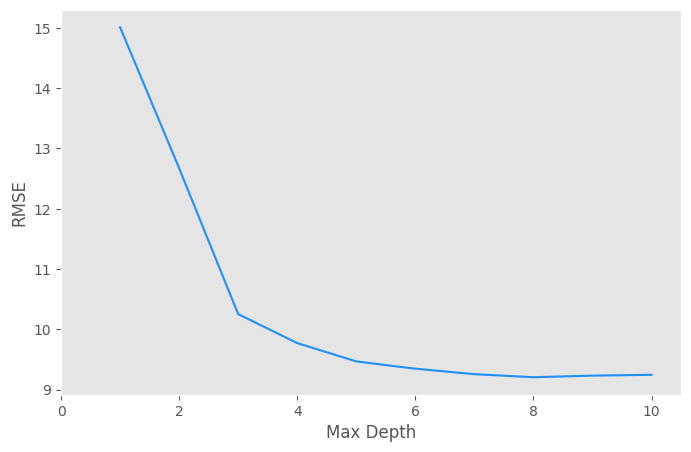

In [54]:
# Plot result
plt.figure(figsize = (8,5))
plt.plot(max_depths3, rms_depth3, color='dodgerblue')
plt.xlabel('Max Depth')
plt.ylabel('RMSE')
plt.xlim(0, 10.5)
plt.grid()


In [84]:
# Re run with max depth = 8
numLoops = 500

rms_error3 = np.zeros( numLoops )

for idx in range( 0, numLoops ):
  X3_train, X3_test, y3_train, y3_test = train_test_split( X3, y3, test_size=0.2 )
  model3 = DecisionTreeRegressor( max_depth=8 )
  model3.fit( X3_train, y3_train )
  y3_pred = model3.predict( X3_test )
  rms_error3[idx] = np.sqrt( mean_squared_error( y3_test, y3_pred ) )

print(f"CV RMSE: {rms_error3.mean().round(2)*1000}")


CV RMSE: 9110.0


In [55]:
# Choose max_depth = 8 due to the lowest RMSE as the plot shown above
numLoops = 500

rmsp_error3 = np.zeros(numLoops)

for idx in range(0,numLoops):
  # Split data into training and testing sets
  X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y3,test_size=0.2)

  # Initialize and train the Decision Tree Regressor model
  model3 = DecisionTreeRegressor(max_depth=8) # max_depth of 8 gave the lowest RMSE
  model3.fit(X3_train,y3_train)

  # Make predictions on the test set
  y3_pred = model3.predict(X3_test)

  # Calculate RMSPE using the defined function
  percentage_error_set3 = np.where(y3_test != 0, (y3_test - y3_pred) / y3_test, 0)
  # Calculate the mean of the squared percentage errors
  mean_squared_percentage_error_set3 = np.mean(np.square(percentage_error_set3))
  # Take the square root to get RMSPE and multiply by 100
  rmsp_error3[idx] = np.sqrt(mean_squared_percentage_error_set3) * 100

#rmsp_error.append(rmsp_error.mean())

# After the loop, calculate the mean RMSPE
print(f"CV RMSPE from linear regression (set 3): {rmsp_error3.mean().round(2)}%")
print(f"Standard Deviation of RMSPE: {rmsp_error3.std():.2f}%")



CV RMSPE from linear regression (set 3): 58.39%
Standard Deviation of RMSPE: 89.69%


## Set 4

In [118]:
X4 = music_type4_encoded.drop(['Popularity','Release Date'], axis = 1)
y4 = music_type4_encoded['Popularity']


In [119]:
# Run to choose max_depths
max_depths4 = [1,2,3,4,5,6,7,8,9,10]
rms_depth4 = np.zeros(len(max_depths4))
std_depth4 = np.zeros(len(max_depths4))

numLoops = 500

for n, depth in enumerate(max_depths4):
  rms_error4 = np.zeros(numLoops)

  for idx in range(0,numLoops):
    X4_train, X4_test, y4_train, y4_test = train_test_split(X4,y4,test_size=0.2)
    model4 = DecisionTreeRegressor(max_depth=depth)
    model4.fit(X4_train,y4_train)
    y4_pred = model4.predict(X4_test)
    rms_error4[idx] = np.sqrt(mean_squared_error(y4_test, y4_pred))

  rms_depth4[n] = rms_error4.mean()
  std_depth4[n] = rms_error4.std( ddof = 1 )

In [120]:
pd.DataFrame( zip( max_depths4, rms_depth4, std_depth4 ) )

,0,1,2
0,1,15.374906,1.079159
1,2,9.482582,0.416454
2,3,9.127970,0.467750
3,4,8.857173,0.478843
4,5,8.891148,0.503256
5,6,8.924010,0.527613
6,7,8.959383,0.558487
7,8,8.986095,0.538875
8,9,9.021417,0.554249
9,10,8.960929,0.581400


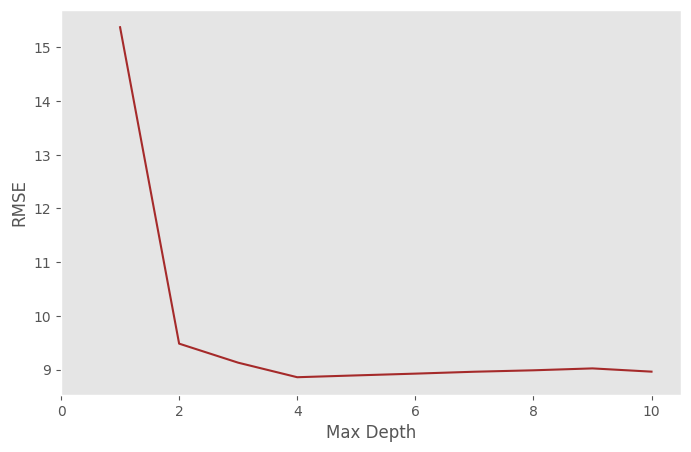

In [123]:
# Plot result
plt.figure(figsize = (8,5))
plt.plot(max_depths4, rms_depth4, color='brown')
plt.xlabel('Max Depth')
plt.ylabel('RMSE')
plt.xlim(0, 10.5)
plt.grid()


In [124]:
# Re run with max depth = 4
numLoops = 500

rms_error4 = np.zeros( numLoops )

for idx in range( 0, numLoops ):
  X4_train, X4_test, y4_train, y4_test = train_test_split( X4, y4, test_size=0.2 )
  model4 = DecisionTreeRegressor( max_depth=4 )
  model4.fit( X4_train, y4_train )
  y4_pred = model4.predict( X4_test )
  rms_error4[idx] = np.sqrt( mean_squared_error( y4_test, y4_pred ) )

print(f"CV RMSE (set 4): {rms_error4.mean().round(2)*1000}")


CV RMSE (set 4): 8880.0


In [125]:
# Choose max_depth = 4 due to the lowest RMSE as the plot shown above
numLoops = 500

rmsp_error4 = np.zeros(numLoops)

for idx in range(0,numLoops):
  # Split data into training and testing sets
  X4_train, X4_test, y4_train, y4_test = train_test_split(X4,y4,test_size=0.2)

  # Initialize and train the Decision Tree Regressor model
  model4 = DecisionTreeRegressor(max_depth=4) # max_depth of 4 gave the lowest RMSE
  model4.fit(X4_train,y4_train)

  # Make predictions on the test set
  y4_pred = model4.predict(X4_test)

  # Calculate RMSPE using the defined function
  percentage_error_set4 = np.where(y4_test != 0, (y4_test - y4_pred) / y4_test, 0)
  # Calculate the mean of the squared percentage errors
  mean_squared_percentage_error_set4 = np.mean(np.square(percentage_error_set4))
  # Take the square root to get RMSPE and multiply by 100
  rmsp_error4[idx] = np.sqrt(mean_squared_percentage_error_set4) * 100

# After the loop, calculate the mean RMSPE
print(f"CV RMSPE from linear regression (set 4): {rmsp_error4.mean().round(2)}%")
print(f"Standard Deviation of RMSPE: {rmsp_error4.std():.2f}%")



CV RMSPE from linear regression (set 4): 15.87%
Standard Deviation of RMSPE: 1.80%


# Data Visualization--Decision Trees

In [58]:
import graphviz
from IPython.display import display
from sklearn import tree


## Set 3--Tree

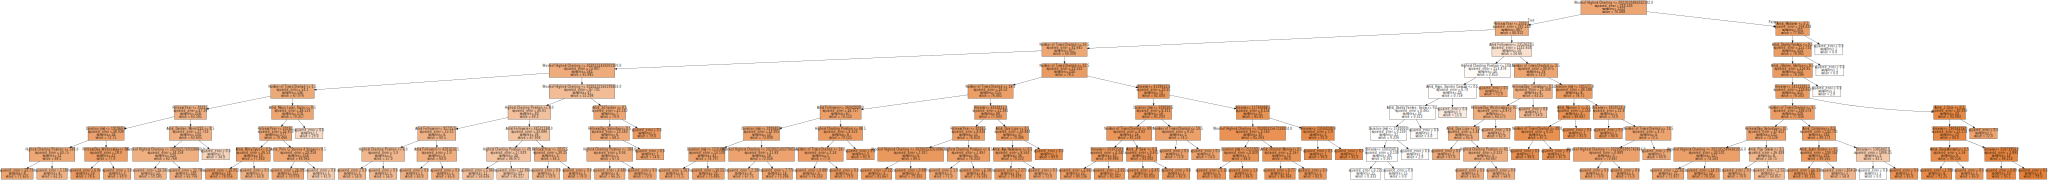

In [61]:
# Option 1
display(
  graphviz.Source(
    tree.export_graphviz(
      model3,
      feature_names = X3.columns,
      filled = True,
    )
  )
)


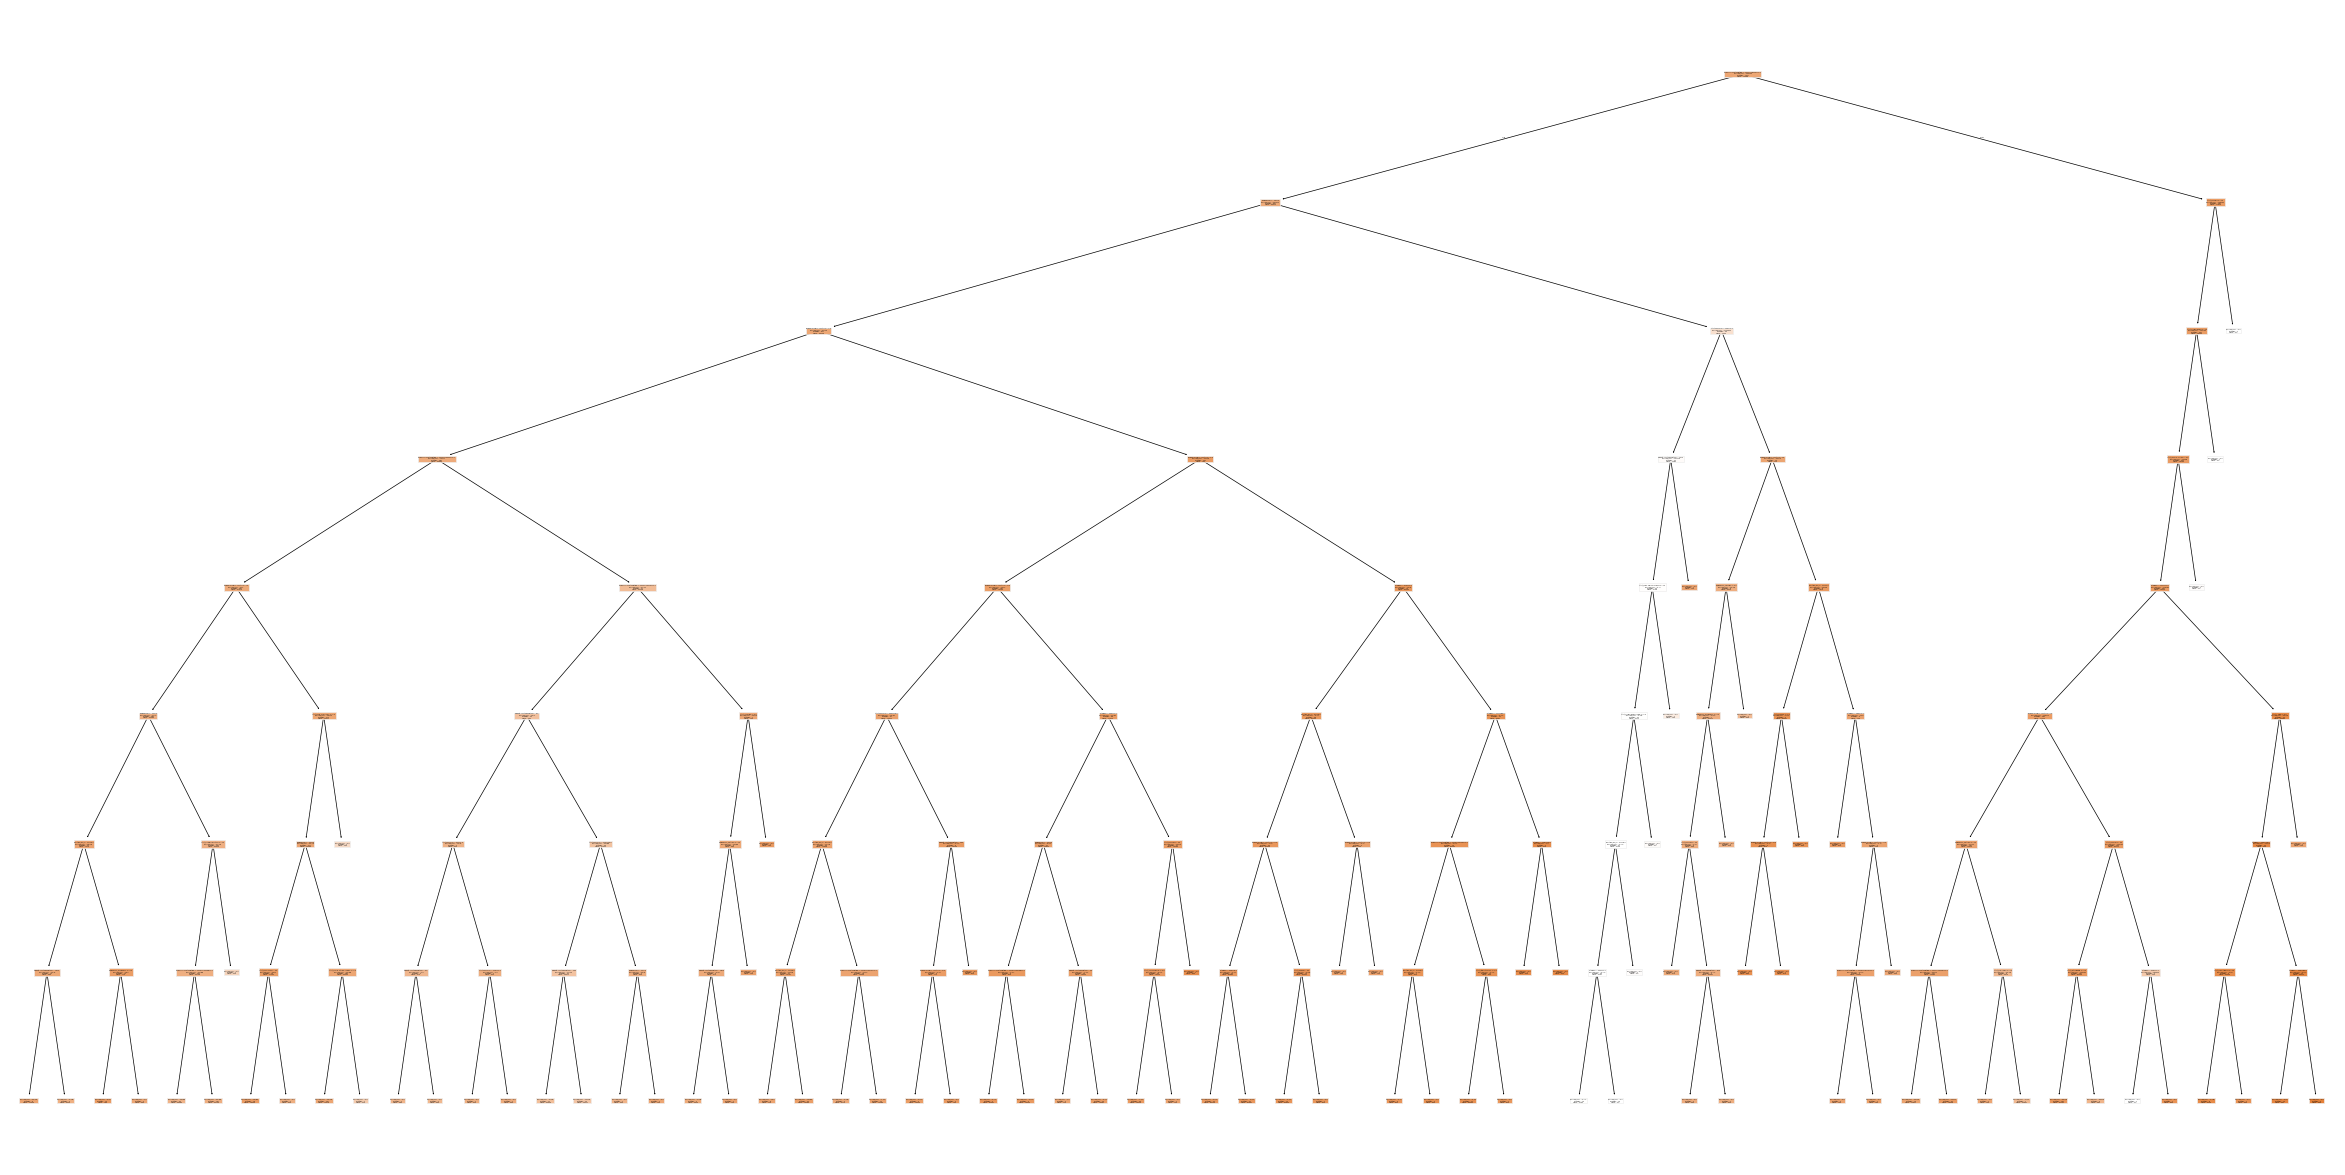

In [62]:
# Option 2
plt.figure(figsize=(30,15))
tree_plot = tree.plot_tree(
  model3,
  feature_names = X3.columns,
  filled=True,
)


## Set 4--Tree

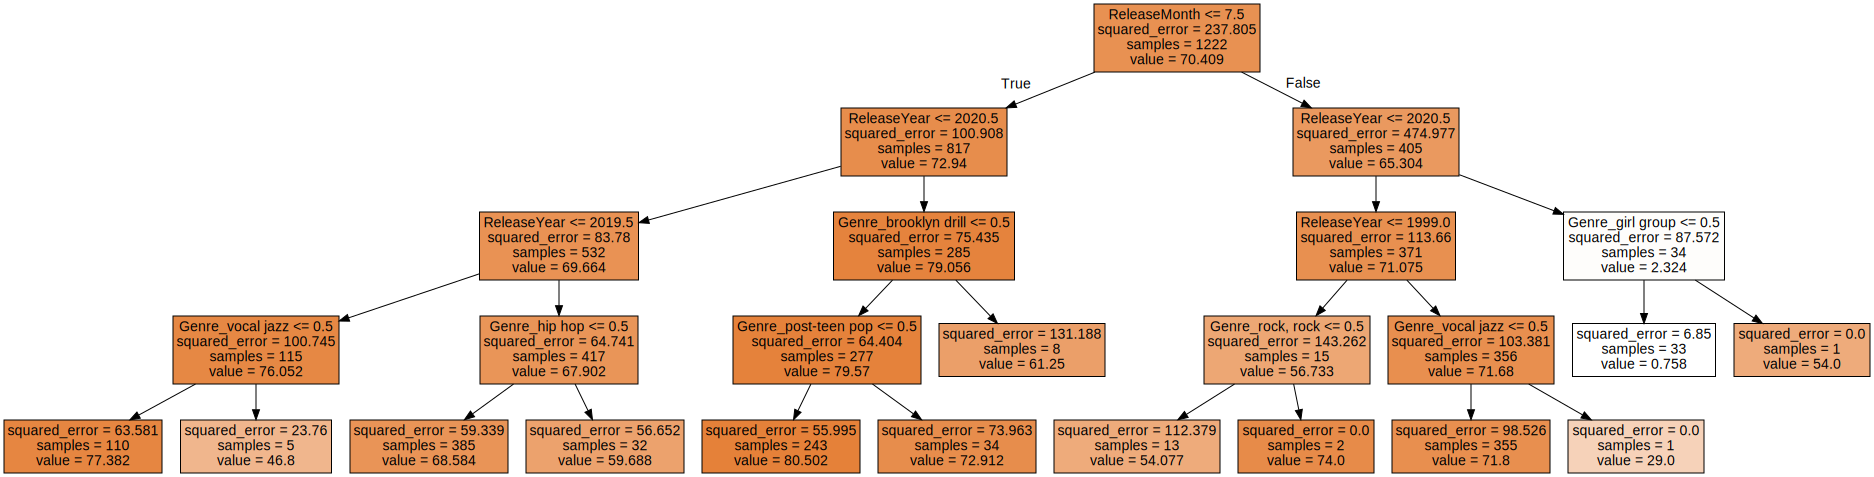

In [126]:
# Option 1-set 4
display(
  graphviz.Source(
    tree.export_graphviz(
      model4,
      feature_names = X4.columns,
      filled = True,
    )
  )
)


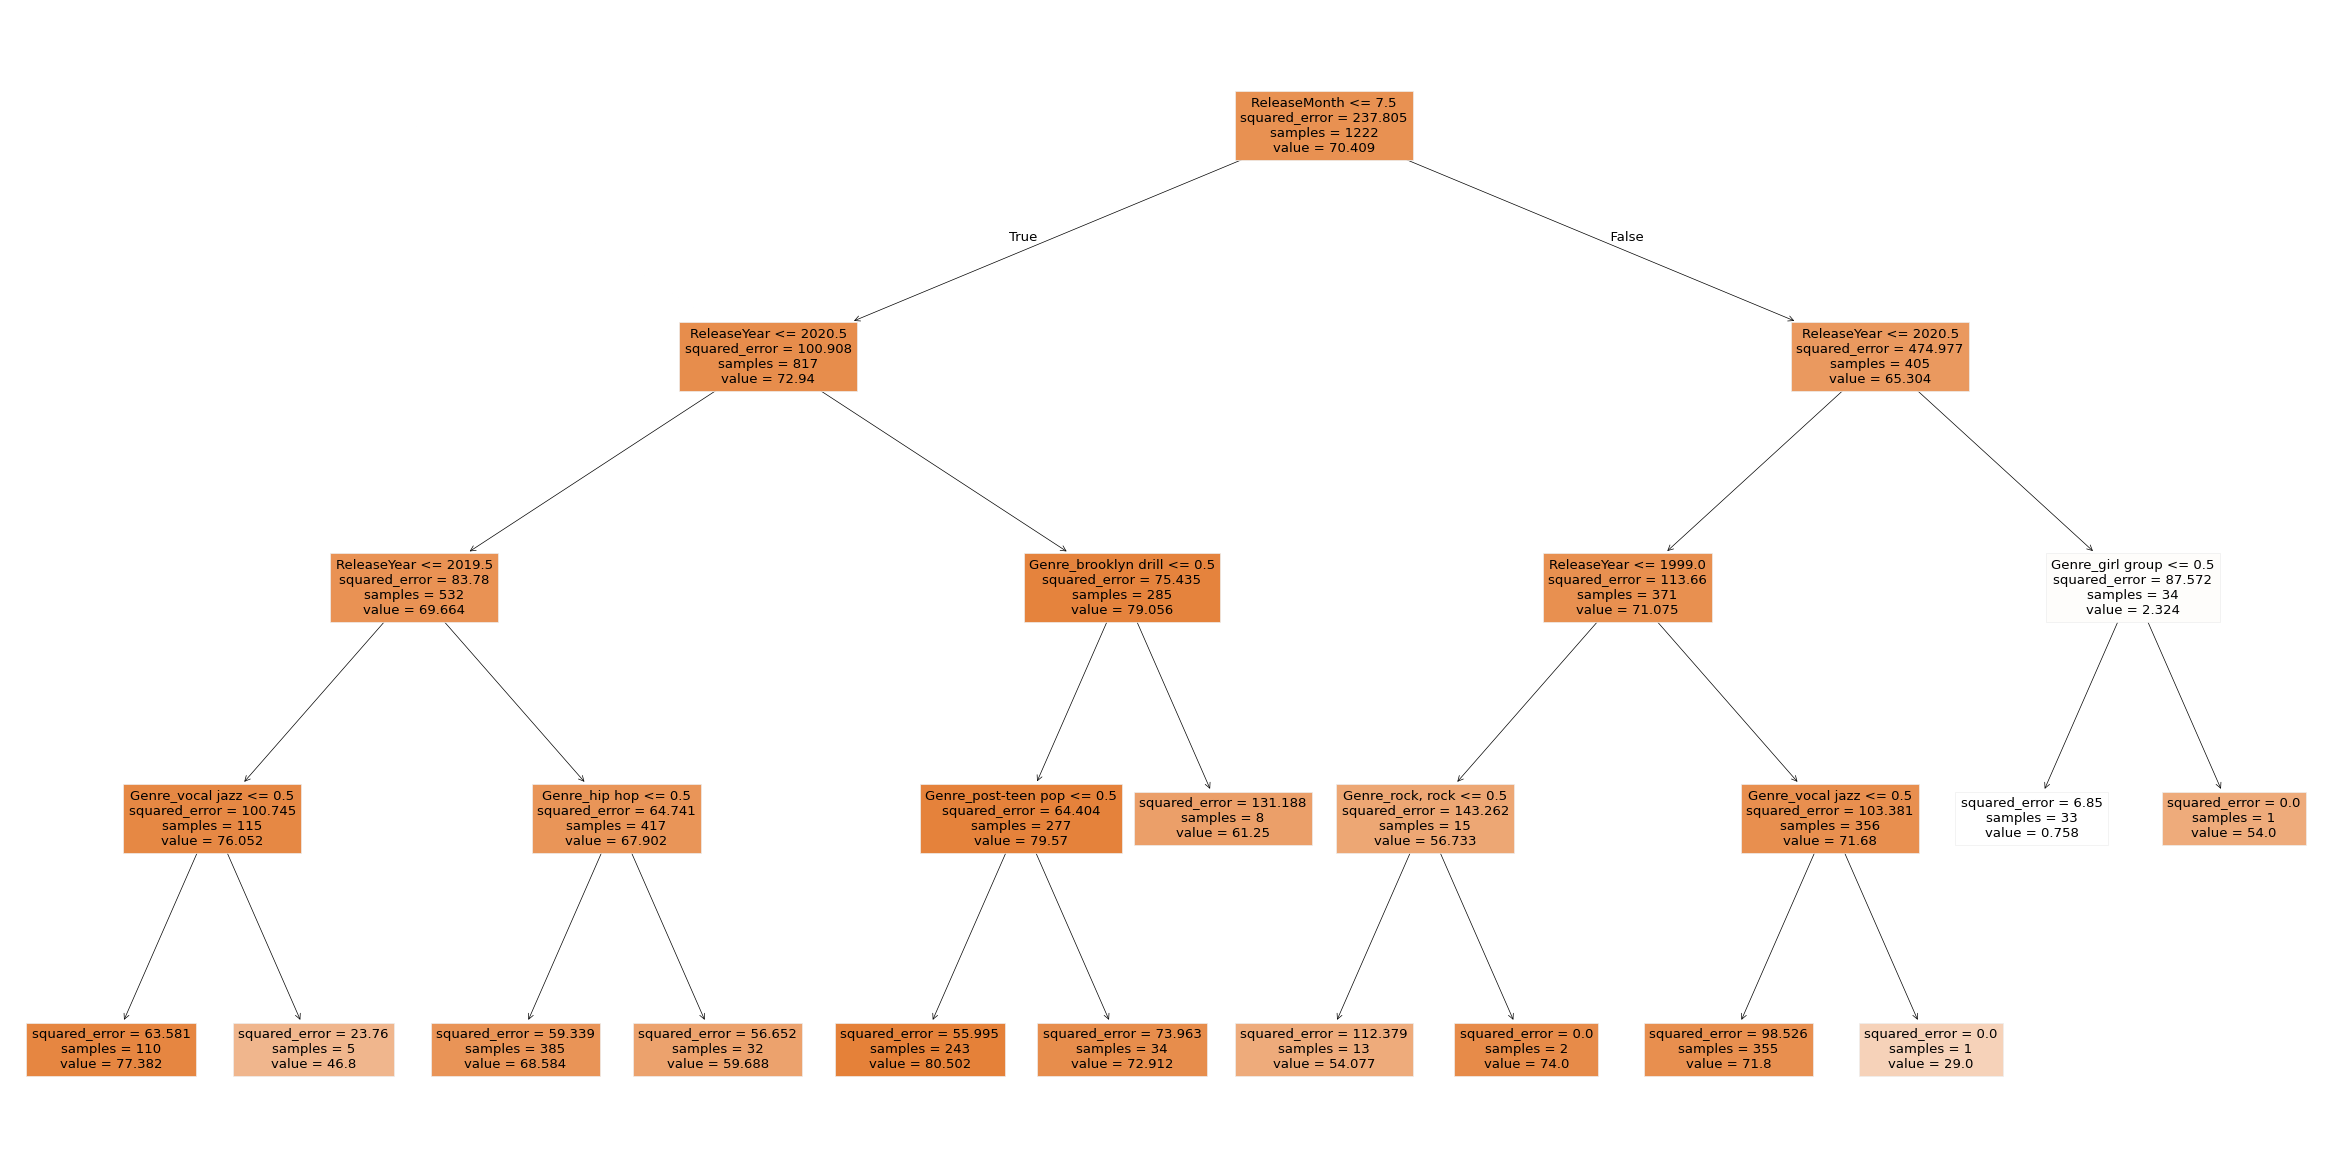

In [127]:
# Option 2
plt.figure(figsize=(30,15))
tree_plot = tree.plot_tree(
  model4,
  feature_names = X4.columns,
  filled=True,
)


# Conclusion

# Takeaways

# Future exploration